# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin AND BTC", language="en")
bitcoin_news['totalResults']

1416

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum AND ETH", language="en")
ethereum_news['totalResults']

475

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article['content']
        title = article['title']
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compund = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment ['neg']
        
        bitcoin_sentiments.append({
            "Text": text,
            "Date": date,
            "Compund": compund,
            "Positive":pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Bitcoin": title,
            
            
        })
    except AttributeError:
        pass
   

bitcoin_df = pd.DataFrame(bitcoin_sentiments)

cols = ["Compund", "Negative", "Neutral","Positive","Title Bitcoin","Text", "Date"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,Compund,Negative,Neutral,Positive,Title Bitcoin,Text,Date
0,0.4404,0.075,0.773,0.152,Bitcoin Could Hit $20K Again But This Time No ...,If youve been watching the crypto markets over...,2020-11-25
1,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20
2,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20
3,0.0000,0.000,1.000,0.000,The Morning After: SpaceX lines up a big test ...,Keep an eye out today — we may see the first h...,2020-12-08
4,0.2023,0.000,0.950,0.050,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",2020-11-20


In [7]:
bitcoin_df.describe()

,Compund,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.153040,0.026200,0.914050,0.059700
std,0.291529,0.034803,0.066919,0.054792
min,-0.421500,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.874750,0.000000
50%,0.115350,0.000000,0.915000,0.057500
75%,0.426225,0.050750,0.962500,0.096750
max,0.612400,0.085000,1.000000,0.152000


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article['content']
        title = article['title']
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compund = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment ['neg']
        
        ethereum_sentiments.append({
            "Text": text,
            "Date": date,
            "Compund": compund,
            "Positive":pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Ethereum": title  
            
            
        })
    except AttributeError:
        pass
   

ethereum_df = pd.DataFrame(ethereum_sentiments)

cols = ["Compund", "Negative", "Neutral","Positive","Title Ethereum","Text", "Date"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,Compund,Negative,Neutral,Positive,Title Ethereum,Text,Date
0,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20
1,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20
2,0.0000,0.000,1.000,0.000,Crypto exchange Coinbase comments on negative ...,The New York Times is (probably) about to publ...,2020-11-26
3,0.5106,0.000,0.912,0.088,The Shape of a Story,Each comment or response costs a tiny ETH fee ...,2020-11-18
4,0.2263,0.047,0.878,0.075,"Bitcoin breaks $17,000 as 2020 rally powers on...","LONDON (Reuters) - Bitcoin passed $17,000 on T...",2020-11-17


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compund,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.308389,0.004611,0.923667,0.071778
std,0.297675,0.013552,0.070096,0.068603
min,0.000000,0.000000,0.831000,0.000000
25%,0.000000,0.000000,0.859500,0.000000
50%,0.261150,0.000000,0.923000,0.070000
75%,0.611650,0.000000,1.000000,0.140500
max,0.726400,0.047000,1.000000,0.169000


### Questions:

Q: Which coin had the highest mean positive score?

A: ethereum data frame has the highest mean positive score.

Q: Which coin had the highest compound score?

A: ethereum data frame has the highest compound score.

Q. Which coin had the highest positive score?

A: ethereum data frame has the highest compund score. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [12]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # For w in words: its going to w.lower() 
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # for every punction t are letters, 
    
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words] # list comprehension
    
    return tokens
   


In [13]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df.Text.apply(tokenizer) #tokenzier(bitcoin_df)
bitcoin_df.head()

,Compund,Negative,Neutral,Positive,Title Bitcoin,Text,Date,tokens
0,0.4404,0.075,0.773,0.152,Bitcoin Could Hit $20K Again But This Time No ...,If youve been watching the crypto markets over...,2020-11-25,"[youve, watching, crypto, market, past, week, ..."
1,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20,"[Reuters, Staff, representation, virtual, curr..."
2,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20,"[Reuters, Staff, representation, virtual, curr..."
3,0.0000,0.000,1.000,0.000,The Morning After: SpaceX lines up a big test ...,Keep an eye out today — we may see the first h...,2020-12-08,"[Keep, eye, today, —, may, see, first, high-al..."
4,0.2023,0.000,0.950,0.050,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",2020-11-20,"[November, 2017, absolutely, massive, two-mont..."


In [14]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df.Text.apply(tokenizer)
ethereum_df.head()

,Compund,Negative,Neutral,Positive,Title Ethereum,Text,Date,tokens
0,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20,"[Reuters, Staff, representation, virtual, curr..."
1,0.0000,0.000,1.000,0.000,"Bitcoin rises to three-year peak, all-time hig...",By Reuters Staff\r\nA representation of virtua...,2020-11-20,"[Reuters, Staff, representation, virtual, curr..."
2,0.0000,0.000,1.000,0.000,Crypto exchange Coinbase comments on negative ...,The New York Times is (probably) about to publ...,2020-11-26,"[New, York, Times, probably, publish, story, c..."
3,0.5106,0.000,0.912,0.088,The Shape of a Story,Each comment or response costs a tiny ETH fee ...,2020-11-18,"[comment, response, cost, tiny, ETH, fee, 0.00..."
4,0.2263,0.047,0.878,0.075,"Bitcoin breaks $17,000 as 2020 rally powers on...","LONDON (Reuters) - Bitcoin passed $17,000 on T...",2020-11-17,"[LONDON, Reuters, Bitcoin, passed, 17,000, Tue..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('YORK', 'Reuters'), 5),
 (('Reuters', 'Bitcoin'), 5),
 (('char', 'SYDNEY'), 4),
 (('SYDNEY', 'Reuters'), 4),
 (('digital', 'currency'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'Bitcoin'), 3),
 (('Bitcoin', 'seen'), 3),
 (('illustration', 'taken'), 3),
 (('2020', 'REUTERS/Dado'), 3),
 (('NEW', 'YORK'), 3),
 (('highest', 'level'), 3),
 (('Reuters', 'safe-haven'), 3),
 (('safe-haven', 'Japanese'), 3),
 (('Japanese', 'yen'), 3),
 (('one-week', 'high'), 3),
 (('high', 'steady'), 3),
 (('steady', 'U.S.'), 3),
 (('U.S.', 'dollar'), 3),
 (('dollar', 'held'), 3)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('Ethereum', '2.0'), 6),
 (('Reuters', 'Bitcoin'), 5),
 (('YORK', 'Reuters'), 4),
 (('deposit', 'contract'), 4),
 (('virtual', 'currency'), 3),
 (('currency', 'Bitcoin'), 3),
 (('Bitcoin', 'seen'), 3),
 (('illustration', 'taken'), 3),
 (('2020', 'REUTERS/Dado'), 3),
 (('highest', 'level'), 3),
 (('Reuters', 'Staff'), 2),
 (('Staff', 'representation'), 2),
 (('representation', 'virtual'), 2),
 (('seen', 'illustration'), 2),
 (('taken', 'November'), 2),
 (('November', '19'), 2),
 (('19', '2020'), 2),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 2),
 (('Ruvic/Illustration', 'NEW'), 2),
 (('NEW', 'YORK'), 2)]

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
all_bitcoin_tokens =  tokenizer(bitcoin_df.Text.str.cat())
token_count(all_bitcoin_tokens)

[('char', 20),
 ('Reuters', 12),
 ('Bitcoin', 12),
 ('currency', 9),
 ('taken', 5),
 ('YORK', 5),
 ('high', 5),
 ('bitcoin', 4),
 ('2017', 4),
 ('soared', 4)]

In [20]:
# Get the top 10 words for Ethereum
all_ethereum_tokens =  tokenizer(ethereum_df.Text.str.cat())
token_count(all_ethereum_tokens)

[('char', 18),
 ('Bitcoin', 11),
 ('Ethereum', 9),
 ('2.0', 8),
 ('Reuters', 7),
 ('contract', 6),
 ('taken', 5),
 ('ETH', 5),
 ('YORK', 4),
 ('wallet', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis(" off")
    fontdict = {'fontsize': 48, 'fontweight' : 'bold'}
    plt.title(title, fontdict=fontdict)
    plt.show()

ValueError: Unrecognized string  off to axis; try on or off

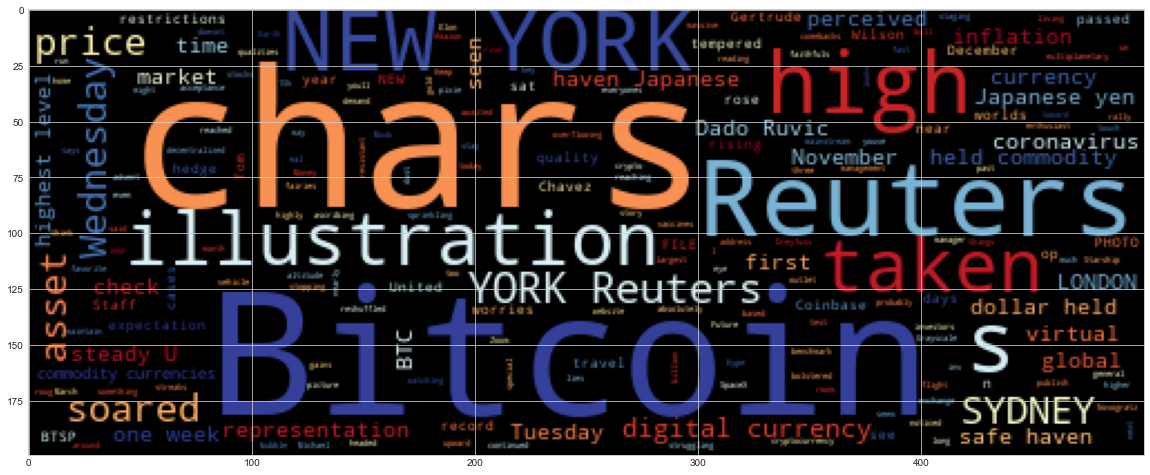

In [23]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin_df.Text.str.cat(), title="Bitcoin Word Cloud")

ValueError: Unrecognized string  off to axis; try on or off

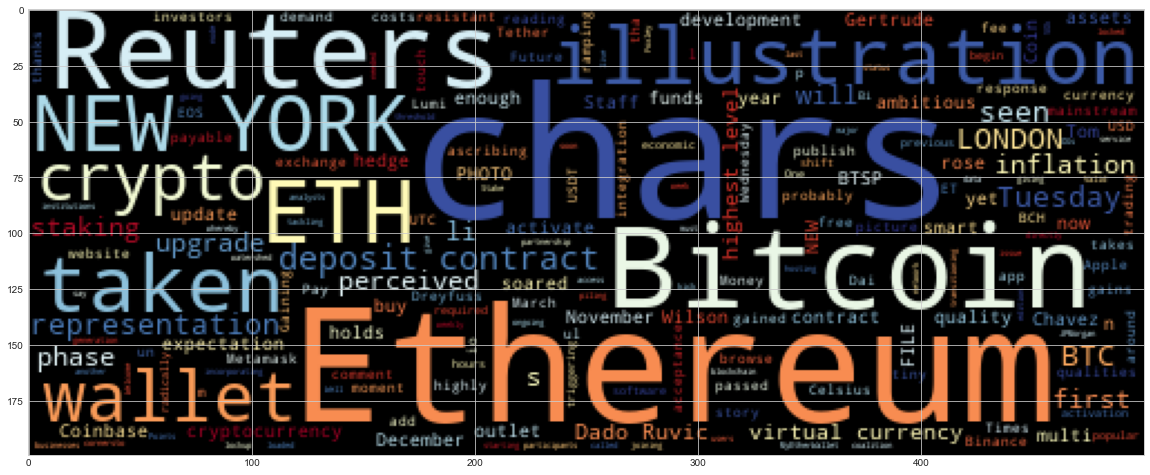

In [24]:
# Generate the Ethereum word cloud
wordcloud(ethereum_df.Text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
all_btc_text = bitcoin_df.Text.str.cat()
all_btc_text

"If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars]Keep an eye out today — we may see the first high-altitude test flight for SpaceX’s Starship. The vehicle Elon Musk sees as the key to fast travel around the Earth and multiplanetary living has only … [+3833 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 d

In [29]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [30]:
# Render the visualization
displacy.render(doc, style='ent', jupyter= True)

In [31]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
today DATE
first ORDINAL
Elon Musk ORG
Earth LOC
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
YORK PERSON
Reuters ORG
Grayscale ORG
Wednesday DATE
a record $10.4 billion MONEY
nearly three years DATE
Bitcoin GPE
over $15k MONEY
BTC ORG
New Bitcoin GPE
Zoom PERSON
Amazon ORG
New York Times ORG
Coinbase ORG
the bubble days of 2017 DATE
bitcoin GPE
Michael Novogratz PERSON
1 CARDINAL
first ORDINAL
2017.The digital-currency enthusiast ORG
Rick 

---

## Ethereum NER

In [34]:
# Concatenate all of the ethereum text together
all_eth_text = ethereum_df.Text.str.cat()
all_eth_text

"By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]The New York Times is (probably) about to publish a story about cryptocurrency exchange Coinbase. But we're not reading about it on the news outlet's website, because Coinbase has taken the highly un… [+3993 chars]Each comment or response costs a tiny ETH fee of 0.00011 (about 5¢ in Ethereum cryptocurrency), payable from your Metamask.io wallet (the wallet is free, and takes just a moment to add to your browse… [+558 chars]LONDON (Reuters) - Bitcoin passed $17,000 on Tuesday to touch its highest level this year, with investors ascribing the gains to demand 

In [36]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [37]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter= True)

In [38]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Coinbase ORG
ETH ORG
0.00011 CARDINAL
about 5¢ CARDINAL
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Bitcoin GPE
Apple ORG
Pay PERSON
Lumi PERSON
ETH ORG
BCH ORG
Tether USDT PERSON
Binance USD ORG
Celsius ORG
Dai PERSON
EOS ORG
Wednesday DATE
Ethereum 2.0 ORG
ul><li PERSON
Bitcoin GPE
BTC ORG
around $15,694 MONEY
21:00 TIME
4 p.m. ET TIME
2.6% PERCENT
the previous 24 DATE
Bi PERSON
first ORDINAL
Ethereum 2.0 ORG
MyEtherWallet DATE
Ethereum 2.0 ORG
Valid Points ORG
Will Foxley PERSON
weekly DATE
Ethereum 2.0 ORG
Coin GPE
chars]More than 500,000 CARDINAL
Ethereum 2.0’s ORG
multi-year DATE
JPMorgan ORG
la